In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,mean_squared_error
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df1 = pd.read_csv('defaultofcreditcardclients.csv')
df1.dataframeName = 'defaultofcreditcardclients.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 30001 rows and 25 columns


In [3]:
defaulters = df1.copy()
print(defaulters.shape)
defaulters.head()

(30001, 25)


,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [4]:
defaulters.drop(defaulters.columns[0],axis='columns', inplace=True)

In [5]:
defaulters.drop(labels=[0], axis=0, inplace=True)

In [6]:
df = defaulters.rename(columns = {'X1': 'Limit_bal', 'X2': 'Sex', 'X3':'Education',
                                 'X4':'Marital','X5':'Age','X6':'Pay_1','X7':'Pay_2',
                                  'X8':'Pay_3', 'X9':'Pay_4', 'X10':'Pay_5','X11':'Pay_6',
                                 'X12':'Bill_amt_1', 'X13':'Bill_amt_2', 'X14':'Bill_amt_3', 
                                 'X15':'Bill_amt_4', 'X16':'Bill_amt_5', 'X17':'Bill_amt_6',
                                 'X18':'Pay_amt_1','X19':'Pay_amt_2', 'X20':'Pay_amt_3',
                                 'X21':'Pay_amt_4', 'X22':'Pay_amt_5', 'X23':'Pay_amt_6',
                                  'Y':'def_payment'
                                 }, inplace = False)

In [7]:
df

,Limit_bal,Sex,Education,Marital,Age,Pay_1,Pay_2,Pay_3,Pay_4,Pay_5,...,Bill_amt_4,Bill_amt_5,Bill_amt_6,Pay_amt_1,Pay_amt_2,Pay_amt_3,Pay_amt_4,Pay_amt_5,Pay_amt_6,def_payment
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


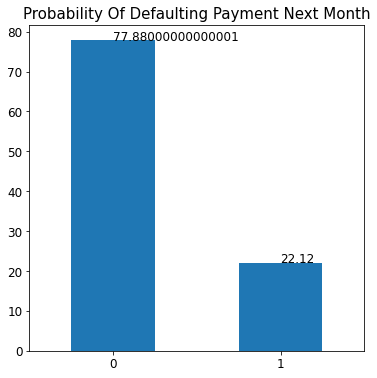

In [8]:
def_cnt = (df.def_payment.value_counts(normalize=True)*100)
def_cnt.plot.bar(figsize=(6,6))
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12)
plt.title("Probability Of Defaulting Payment Next Month", fontsize=15)
for x,y in zip([0,1],def_cnt):
    plt.text(x,y,y,fontsize=12)
plt.show()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Limit_bal    30000 non-null  object
 1   Sex          30000 non-null  object
 2   Education    30000 non-null  object
 3   Marital      30000 non-null  object
 4   Age          30000 non-null  object
 5   Pay_1        30000 non-null  object
 6   Pay_2        30000 non-null  object
 7   Pay_3        30000 non-null  object
 8   Pay_4        30000 non-null  object
 9   Pay_5        30000 non-null  object
 10  Pay_6        30000 non-null  object
 11  Bill_amt_1   30000 non-null  object
 12  Bill_amt_2   30000 non-null  object
 13  Bill_amt_3   30000 non-null  object
 14  Bill_amt_4   30000 non-null  object
 15  Bill_amt_5   30000 non-null  object
 16  Bill_amt_6   30000 non-null  object
 17  Pay_amt_1    30000 non-null  object
 18  Pay_amt_2    30000 non-null  object
 19  Pay_amt_3    30000 non-nu

In [10]:
df['Limit_bal']=df['Limit_bal'].astype(int) 
df['Sex']=df['Sex'].astype(int)
df['Education']=df['Education'].astype(int)
df['Marital']=df['Marital'].astype(int)
df['Age']=df['Age'].astype(int)
df['Pay_1']=df['Pay_1'].astype(int)
df['Pay_2']=df['Pay_2'].astype(int)
df['Pay_3']=df['Pay_3'].astype(int)
df['Pay_4']=df['Pay_4'].astype(int)
df['Pay_5']=df['Pay_5'].astype(int)
df['Pay_6']=df['Pay_6'].astype(int)

In [11]:
df['Bill_amt_1']=df['Bill_amt_1'].astype(int) 
df['Bill_amt_2']=df['Bill_amt_2'].astype(int)
df['Bill_amt_3']=df['Bill_amt_3'].astype(int)
df['Bill_amt_4']=df['Bill_amt_4'].astype(int)
df['Bill_amt_5']=df['Bill_amt_5'].astype(int)
df['Bill_amt_6']=df['Bill_amt_6'].astype(int)
df['Pay_amt_1']=df['Pay_amt_1'].astype(int)
df['Pay_amt_2']=df['Pay_amt_2'].astype(int)
df['Pay_amt_3']=df['Pay_amt_3'].astype(int)
df['Pay_amt_4']=df['Pay_amt_4'].astype(int)
df['Pay_amt_5']=df['Pay_amt_5'].astype(int)
df['Pay_amt_6']=df['Pay_amt_6'].astype(int)
df['def_payment']=df['def_payment'].astype(int)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Limit_bal    30000 non-null  int64
 1   Sex          30000 non-null  int64
 2   Education    30000 non-null  int64
 3   Marital      30000 non-null  int64
 4   Age          30000 non-null  int64
 5   Pay_1        30000 non-null  int64
 6   Pay_2        30000 non-null  int64
 7   Pay_3        30000 non-null  int64
 8   Pay_4        30000 non-null  int64
 9   Pay_5        30000 non-null  int64
 10  Pay_6        30000 non-null  int64
 11  Bill_amt_1   30000 non-null  int64
 12  Bill_amt_2   30000 non-null  int64
 13  Bill_amt_3   30000 non-null  int64
 14  Bill_amt_4   30000 non-null  int64
 15  Bill_amt_5   30000 non-null  int64
 16  Bill_amt_6   30000 non-null  int64
 17  Pay_amt_1    30000 non-null  int64
 18  Pay_amt_2    30000 non-null  int64
 19  Pay_amt_3    30000 non-null  int64
 20  Pay_am

In [13]:
#df['def_payment'].astype(int)
df_y = df.def_payment
df_X = df.drop(['def_payment'], axis=1)



In [14]:
df_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Limit_bal   30000 non-null  int64
 1   Sex         30000 non-null  int64
 2   Education   30000 non-null  int64
 3   Marital     30000 non-null  int64
 4   Age         30000 non-null  int64
 5   Pay_1       30000 non-null  int64
 6   Pay_2       30000 non-null  int64
 7   Pay_3       30000 non-null  int64
 8   Pay_4       30000 non-null  int64
 9   Pay_5       30000 non-null  int64
 10  Pay_6       30000 non-null  int64
 11  Bill_amt_1  30000 non-null  int64
 12  Bill_amt_2  30000 non-null  int64
 13  Bill_amt_3  30000 non-null  int64
 14  Bill_amt_4  30000 non-null  int64
 15  Bill_amt_5  30000 non-null  int64
 16  Bill_amt_6  30000 non-null  int64
 17  Pay_amt_1   30000 non-null  int64
 18  Pay_amt_2   30000 non-null  int64
 19  Pay_amt_3   30000 non-null  int64
 20  Pay_amt_4   30000 non-null  

In [15]:
df_y

1        1
2        1
3        0
4        0
5        0
        ..
29996    0
29997    0
29998    1
29999    1
30000    1
Name: def_payment, Length: 30000, dtype: int64

In [16]:
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=10)

model1 = LogisticRegression()
model1.fit(X_train, y_train)

y_pred = model1.predict(X_test)

print(classification_report(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))
print('\nAccuracy Score for model1: ', accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.78      0.88      5995
           1       0.00      0.40      0.00         5

    accuracy                           0.78      6000
   macro avg       0.50      0.59      0.44      6000
weighted avg       1.00      0.78      0.88      6000

[[4680 1315]
 [   3    2]]

Accuracy Score for model1:  0.7803333333333333


In [21]:
df_X1 = df_X[['Sex','Marital','Age','Bill_amt_1','Education','Pay_1']]
#df_y1 = df_y.def_payment

X_train, X_test, y_train, y_test = train_test_split(df_X1, df_y, test_size=0.3, random_state=20)

model5 = RidgeClassifier()
model5.fit(X_train, y_train)

y_pred = model5.predict(X_test)
y_train_pred = model5.predict(X_train)

print(classification_report(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))
print('\nTest Accuracy Score for model5: ', accuracy_score(y_pred,y_test))
print('\nTrain Accuracy Score for model5: ', accuracy_score(y_train_pred,y_train))

              precision    recall  f1-score   support

           0       0.99      0.79      0.88      8694
           1       0.11      0.70      0.18       306

    accuracy                           0.79      9000
   macro avg       0.55      0.75      0.53      9000
weighted avg       0.96      0.79      0.86      9000

[[6910 1784]
 [  93  213]]

Test Accuracy Score for model5:  0.7914444444444444

Train Accuracy Score for model5:  0.7915238095238095
